# 序言

- OpenCV的图像处理模块包含的内容很多：
    1. Image Filtering
    2. Geometric Image Transformations
    3. Miscellaneous Image Transformations
    4. Drawing Functions
    5. Color Space Conversions
    6. ColorMaps in OpenCV
    7. Planar Subdivision
    8. Histograms
    9. Structural Analysis and Shape Descriptors本
    10. Motion Analysis and Object Tracking
    11. Feature Detection
    12. Object Detection
    13. C API
    14. Hardware Acceleration Layer

# 图形绘制函数

## 基本几何图形绘制

### 直线

1. 直线函数说明
    - 对于具有整数坐标的非抗锯齿线，使用8连通或4连通的Bresenham算法。
        - LINE_4
        - LINE_8
    - 使用高斯滤波绘制抗锯齿线。
        - LINE_AA

    - 小数坐标使用抗锯齿绘制。
    - 粗线以圆角结尾绘制。
    
```C++
void 	cv::line (
    InputOutputArray img,     // 绘制的图像缓冲
    Point pt1, Point pt2,        // 直线的两个点
    const Scalar &color,       // 直线颜色
    int thickness=1,              // 直线粗细，粗线的断点是圆角点短
    int lineType=LINE_8,       // 线条绘制的算法
    int shift=0)                    // 坐标点的小数位数
```

```C++
    // 线条绘制算法类型定义
    enum  	cv::LineTypes { 
          cv::FILLED = -1, 
          cv::LINE_4 = 4, 
          cv::LINE_8 = 8, 
          cv::LINE_AA = 16 
    }
```

2. 实现代码

```C++
#include <opencv2/opencv.hpp>
#include <iostream>
#define WIN_W 400
#define WIN_H 300

int main(int argc, const char** argv) {
    cv::namedWindow("Win_draw", cv::WINDOW_NORMAL);
    cv::resizeWindow("Win_draw", WIN_W, WIN_H);
    cv::moveWindow("Win_draw", (1280 - WIN_W) / 2, (800 - WIN_H) / 2);
    ///////////////////////////////////
    // 构造一副图像
    cv::Mat  image(WIN_H, WIN_W, CV_8UC4);      // 图像格式4个无符号字节（存放RGBA像素）
    /* 
    void cv::line(
        InputOutputArray img, 
        Point pt1, 
        Point pt2, 
        const Scalar &color, 
        int thickness=1, 
        int lineType=LINE_8, 
        int shift=0)
    */
    cv::line(
       image,                       // 绘制的图像缓冲
       cv::Point(0, 0),             // 绘制直线的开始点
       cv::Point(WIN_W, WIN_H),     // 绘制直线的结束点
       cv::Scalar(255, 0, 0, 0),    // 绘制直线的颜色(BGRA)或者使用cv::RGB()宏
       5,                           // 线条的粗细
       cv::LINE_AA,                 // 绘制线条的算法
       0                            // 坐标点的小数位数
    );
    cv::imshow("Win_draw", image);
    ///////////////////////////////////

    cv::waitKey();
    return 0;
}

// 编译命令：g++  -omain  cv01_draw_lines.cpp -std=c++11 -I/usr/local/include/opencv4 -lopencv_core -lopencv_highgui -lopencv_imgcodecs -lopencv_imgproc

```

### 折线

1. 折线（多边线）函数说明
    - 第一个函数的顶点数组参数是const Point *const *，二重指针索引的多个多边形。
    - 第二个函数的顶点数组参数是InputArrayOfArrays，就是向量的向量std::vector< std::vector<cv::Point>>;

```C++
void 	cv::polylines (
    InputOutputArray img, 
    const Point *const *pts,  // 多个多边形的顶点数组数据
    const int *npts,     // 一个数组，指定每个多边形的顶点个数
    int ncontours,       // 多边形个数
    bool isClosed,      
    const Scalar &color, 
    int thickness=1, 
    int lineType=LINE_8, 
    int shift=0)
void 	cv::polylines (
    InputOutputArray img, 
    InputArrayOfArrays pts, 
    bool isClosed, 
    const Scalar &color, 
    int thickness=1, 
    int lineType=LINE_8, 
    int shift=0)
```

2. 代码

```C++
#include <opencv2/opencv.hpp>
#include <iostream>
#define WIN_W 400
#define WIN_H 300

int main(int argc, const char** argv) {
    cv::namedWindow("Win_draw", cv::WINDOW_NORMAL);
    cv::resizeWindow("Win_draw", WIN_W, WIN_H);
    cv::moveWindow("Win_draw", (1280 - WIN_W) / 2, (800 - WIN_H) / 2);
    ///////////////////////////////////
    // 构造一副图像
    cv::Mat  image(WIN_H, WIN_W, CV_8UC4);      // 图像格式4个无符号字节（存放RGBA像素）
    /*
    // 使用指针传递折线的多个点
    void 	cv::polylines (
        InputOutputArray img, 
        const Point *const *pts, const int *npts,     // 折线的顶点数据 与 顶点数
        int ncontours,                                // 绘制的折线个数
        bool isClosed,                                // 是否自动封闭
        const Scalar &color, 
        int thickness=1, 
        int lineType=LINE_8, 
        int shift=0)
    // 使用InputArrayOfArrays数据结构传递折线的多个点
    void 	cv::polylines (InputOutputArray img, InputArrayOfArrays pts, bool isClosed, const Scalar &color, int thickness=1, int lineType=LINE_8, int shift=0)
     */
    cv::Point  points[2][3] = {
        {
            cv::Point(200, 10),
            cv::Point(10, 150),
            cv::Point(390, 150)
        },  
        {
            cv::Point(10, 160),
            cv::Point(300, 160),
            cv::Point(200, 290)
        }

    };
    int count[2] = {3, 3};
    const cv::Point  *pts[] = {points[0], points[1]};
    cv::polylines(
        image,      // 图像
        pts,        // 顶点（二重指针，行表示一个多边形，列表示点），注意类型const Point *const *pts
        count,      // 数组，用来表示每个多边形
        2,          // 多边形个数
        true,       // 封闭
        cv::Scalar(255,0,255, 255), 
        2, 
        cv::LINE_8,
        0);
    // 上面不能使用数组，因为数组的是连续数据类型，二重指针无法正确索引，所以需要使用二重指针重新索引。
    /**
     * void cv::polylines	(	
            InputOutputArray 	img,
            InputArrayOfArrays 	pts,
            bool 	isClosed,
            const Scalar & 	color,
            int 	thickness = 1,
            int 	lineType = LINE_8,
            int 	shift = 0 
        )	
     */
    std::vector< std::vector<cv::Point>>  vpts;
    std::vector<cv::Point> py_1;
    py_1.push_back(points[0][0]);
    py_1.push_back(points[0][1]);
    py_1.push_back(points[0][2]);

    std::vector<cv::Point> py_2;
    py_2.push_back(points[1][0]);
    py_2.push_back(points[1][1]);
    py_2.push_back(points[1][2]);

    vpts.push_back(py_1);
    vpts.push_back(py_2);

    cv::polylines(
        image,      // 图像
        vpts,       // 顶点 (二重vector)
        true,       // 封闭
        cv::Scalar(0, 255, 255, 255), 
        2, 
        cv::LINE_8,
        0);
    cv::imshow("Win_draw", image);
    ///////////////////////////////////

    cv::waitKey();
    return 0;
}

// 编译命令：g++  -omain  cv02_draw_ploylines.cpp -std=c++11 -I/usr/local/include/opencv4 -lopencv_core -lopencv_highgui -lopencv_imgcodecs -lopencv_imgproc


```

### 箭头线

1. 箭头线函数

```C++
void 	cv::arrowedLine (
    InputOutputArray img, 
    Point pt1, Point pt2, 
    const Scalar &color, 
    int thickness=1, 
    int line_type=8, 
    int shift=0, 
    double tipLength=0.1)  // 箭头的长度，是整个直线的百分比
```

2. 例子代码

```C++
#include <opencv2/opencv.hpp>
#include <iostream>
#define WIN_W 400
#define WIN_H 300

int main(int argc, const char** argv) {
    cv::namedWindow("Win_draw", cv::WINDOW_NORMAL);
    cv::resizeWindow("Win_draw", WIN_W, WIN_H);
    cv::moveWindow("Win_draw", (1280 - WIN_W) / 2, (800 - WIN_H) / 2);
    ///////////////////////////////////
    // 构造一副图像
    cv::Mat  image(WIN_H, WIN_W, CV_8UC4);      // 图像格式4个无符号字节（存放RGBA像素）
    /* 
    void cv::arrowedLine(
        InputOutputArray img, 
        Point pt1, Point pt2, 
        const Scalar &color, 
        int thickness=1, 
        int line_type=8, 
        int shift=0, 
        double tipLength=0.1)  // 头长度(整个直线的百分比)
    */
    cv::arrowedLine(
        image,                       // 绘制的图像缓冲
        cv::Point(100, 150),             // 绘制直线的开始点
        cv::Point(300, 150),     // 绘制直线的结束点
        cv::Scalar(255, 0, 0, 0),    // 绘制直线的颜色(BGRA)或者使用cv::RGB()宏
        1,                           // 线条的粗细
        cv::LINE_AA,                 // 绘制线条的算法
        0,                            // 坐标点的小数位数
        0.1
    );
    cv::imshow("Win_draw", image);
    ///////////////////////////////////

    cv::waitKey();
    return 0;
}

// 编译命令：g++  -omain  cv03_draw_arrowline.cpp -std=c++11 -I/usr/local/include/opencv4 -lopencv_core -lopencv_highgui -lopencv_imgcodecs -lopencv_imgproc

```

### 圆

1. 圆函数说明

```C++
void 	cv::circle (InputOutputArray img, Point center, int radius, const Scalar &color, int thickness=1, int lineType=LINE_8, int shift=0)
```

2. 例子代码

```C++
       cv::Mat  image(WIN_H, WIN_W, CV_8UC4);      // 图像格式4个无符号字节（存放RGBA像素）
        /*  参数简单明了。
            void cv::circle	(	InputOutputArray 	img,
                Point 	center,
                int 	radius,
                const Scalar & 	color,
                int 	thickness = 1,
                int 	lineType = LINE_8,
                int 	shift = 0 
            )	
        */
        cv::circle(
            image, 
            cv::Point(WIN_W /2, WIN_H / 2),     // 圆心
            100,                                // 半径
            CV_RGB(255,0,0),                    // 颜色
            2, 
            cv::LINE_AA, 
            0
        );
        cv::imshow("Win_draw", image);
```

### 矩形

1. 矩形函数说明

```C++
    void 	cv::rectangle (InputOutputArray img, Point pt1, Point pt2, const Scalar &color, int thickness=1, int lineType=LINE_8, int shift=0)
    void 	cv::rectangle (InputOutputArray img, Rect rec, const Scalar &color, int thickness=1, int lineType=LINE_8, int shift=0)
```

2. 例子代码

```C++
    ///////////////////////////////////
    // 构造一副图像
    cv::Mat  image(WIN_H, WIN_W, CV_8UC4);      // 图像格式4个无符号字节（存放RGBA像素）
    /*  参数简单明了。
    // 第一个函数指定矩形的左下角与右上角点
    void cv::rectangle (InputOutputArray img, Point pt1, Point pt2, const Scalar &color, int thickness=1, int lineType=LINE_8, int shift=0)
    // 第二个函数指定矩形左上角与高宽
    void cv::rectangle (
        InputOutputArray img, 
        Rect rec,      // 矩形参数
        const Scalar &color, 
        int thickness=1, 
        int lineType=LINE_8, 
        int shift=0)
    */
   cv::rectangle(
       image,
       cv::Rect(10,100,200,200),   // 左下角顶点与高宽
       CV_RGB(255,0,0),
       2,
       cv::LINE_AA,
       0
    );
    cv::imshow("Win_draw", image);
    ///////////////////////////////////
```

### 椭圆与弧

1. 椭圆函数说明

```C++
    void 	cv::ellipse (InputOutputArray img, Point center, Size axes, double angle, double startAngle, double endAngle, const Scalar &color, int thickness=1, int lineType=LINE_8, int shift=0)
    void 	cv::ellipse (InputOutputArray img, const RotatedRect &box, const Scalar &color, int thickness=1, int lineType=LINE_8)

```

2. 例子代码

```C++
   ///////////////////////////////////
    // 构造一副图像
    cv::Mat  image(WIN_H, WIN_W, CV_8UC4);      // 图像格式4个无符号字节（存放RGBA像素）
    /* 
    void cv::ellipse (
        InputOutputArray img, 
        Point center,           // 椭圆的圆心
        Size axes,              // 长半轴与短半轴
        double angle,           // 倾斜角度(单位度数，不是弧度)
        double startAngle,      // 椭圆弧开始角度
        double endAngle,        // 椭圆弧结束角度
        const Scalar &color, 
        int thickness=1, 
        int lineType=LINE_8, 
        int shift=0)
    void cv::ellipse(
        InputOutputArray img, 
        const RotatedRect &box,   // 使用类封装椭圆的几个参数：圆心，长半轴与短半轴，角度
        const Scalar &color, 
        int thickness=1, 
        int lineType=LINE_8)  // 没有开始与结束角度，最后的小数点位数也没有了
    // 旋转矩形类
    RotatedRect (const Point2f &center, const Size2f &size, float angle)
    */
    // cv::ellipse(
    //     image,
    //     cv::Point(100,100),
    //     cv::Size(100,50),
    //     45.0,
    //     0.0,
    //     330.0,
    //     CV_RGB(255,0,0),
    //     2,
    //     cv::LINE_AA,
    //     0);
        cv::ellipse(
        image,
        cv::RotatedRect(cv::Point(100,100),cv::Size(100,50),45.0),
        CV_RGB(255,0,0),
        2,
        cv::LINE_AA);
    cv::imshow("Win_draw", image);
    ///////////////////////////////////
```

### 轮廓线

1. 轮廓线函数说明

```C++
void 	cv::drawContours (InputOutputArray image, InputArrayOfArrays contours, int contourIdx, const Scalar &color, int thickness=1, int lineType=LINE_8, InputArray hierarchy=noArray(), int maxLevel=INT_MAX, Point offset=Point())
```

2. 例子代码

```C++
    ///////////////////////////////////
    // 构造一副图像
    cv::Mat  image(WIN_H, WIN_W, CV_8UC4);      // 图像格式4个无符号字节（存放RGBA像素）

    cv::Point  points[2][3] = {
        {
            cv::Point(200, 10),
            cv::Point(10, 150),
            cv::Point(390, 150)
        },  
        {
            cv::Point(10, 160),
            cv::Point(300, 160),
            cv::Point(200, 290)
        }

    };
    /**
    void cv::drawContours	(	
        InputOutputArray 	image,      // 缓冲图像
        InputArrayOfArrays 	contours,   // 数据顶点  std::vector< std::vector<cv::Point>>  一个vector一个轮廓
        int 	contourIdx,             // 需要绘制的轮廓线，负数表示绘制所有轮廓线
        const Scalar & 	color,
        int 	thickness = 1,
        int 	lineType = LINE_8,
        InputArray 	hierarchy = noArray(),  // 执行需要绘制的轮廓信息
        int 	maxLevel = INT_MAX,         // 轮廓线嵌套的深度
        Point 	offset = Point()            // 轮廓线的偏移位置𝚘𝚏𝚏𝚜𝚎𝚝=(dx,dy)
    )	
     */
    std::vector< std::vector<cv::Point>>  vpts;
    std::vector<cv::Point> py_1;
    py_1.push_back(points[0][0]);
    py_1.push_back(points[0][1]);
    py_1.push_back(points[0][2]);

    std::vector<cv::Point> py_2;
    py_2.push_back(points[1][0]);
    py_2.push_back(points[1][1]);
    py_2.push_back(points[1][2]);

    vpts.push_back(py_1);
    vpts.push_back(py_2);
    int h[]={0,1};
    cv::drawContours(
        image,
        vpts,
        0,
        CV_RGB(255,0,0),
        2,
        cv::LINE_AA);   // 剩下的参数可选，使用默认
    /**
     * 自己构造轮廓线（等高线）比较复杂，这个可以通过算法，抽取图像轮廓，后面专门用一节研究
     */
    cv::imshow("Win_draw", image);
    ///////////////////////////////////
```

### 标记

1. 标记（Marker）函数说明

```C++
void 	cv::drawMarker (InputOutputArray img, Point position, const Scalar &color, int markerType=MARKER_CROSS, int markerSize=20, int thickness=1, int line_type=8)
```

- marker类型
    - MARKER_CROSS 
    - MARKER_TILTED_CROSS
    - MARKER_STAR
    - MARKER_DIAMOND
    - MARKER_SQUARE
    - MARKER_TRIANGLE_UP
    - MARKER_TRIANGLE_DOWN

2. 例子代码

```C++
    ///////////////////////////////////
    // 构造一副图像
    cv::Mat  image(WIN_H, WIN_W, CV_8UC4);      // 图像格式4个无符号字节（存放RGBA像素）

    /**
    void cv::drawMarker (
        InputOutputArray img, 
        Point position,                 // 位置
        const Scalar &color,    
        int markerType=MARKER_CROSS,    // marler类型
        int markerSize=20,              // marker大小
        int thickness=1,                // 线粗细
        int line_type=8)                // 线绘制算法
     */
    /**
     * - marker类型
            - MARKER_CROSS 
            - MARKER_TILTED_CROSS
            - MARKER_STAR
            - MARKER_DIAMOND
            - MARKER_SQUARE
            - MARKER_TRIANGLE_UP
            - MARKER_TRIANGLE_DOWN
     */
    cv::drawMarker(
        image,
        cv::Point(100,100),
        CV_RGB(255,0,0),
        cv::MARKER_CROSS,
        5,
        1,
        cv::LINE_AA
    );
    cv::imshow("Win_draw", image);
    ///////////////////////////////////
```

### 填充

1. 填充函数说明

```C++
void 	cv::fillConvexPoly (InputOutputArray img, const Point *pts, int npts, const Scalar &color, int lineType=LINE_8, int shift=0)
 
void 	cv::fillConvexPoly (InputOutputArray img, InputArray points, const Scalar &color, int lineType=LINE_8, int shift=0)

void 	cv::fillPoly (InputOutputArray img, const Point **pts, const int *npts, int ncontours, const Scalar &color, int lineType=LINE_8, int shift=0, Point offset=Point())

void 	cv::fillPoly (InputOutputArray img, InputArrayOfArrays pts, const Scalar &color, int lineType=LINE_8, int shift=0, Point offset=Point())
```

2. 例子代码

```C++
    ///////////////////////////////////
    // 构造一副图像
    cv::Mat  image(WIN_H, WIN_W, CV_8UC4);      // 图像格式4个无符号字节（存放RGBA像素）

    cv::Point  points[2][3] = {
        {
            cv::Point(200, 10),
            cv::Point(10, 150),
            cv::Point(390, 150)
        },  
        {
            cv::Point(10, 160),
            cv::Point(300, 160),
            cv::Point(200, 290)
        }

    };
    int count[2] = {3, 3};
    const cv::Point  *pts[] = {points[0], points[1]};
    /**
    void cv::fillPoly (
        InputOutputArray img, 
        const Point **pts, 
        const int *npts, 
        int ncontours, 
        const Scalar &color, 
        int lineType=LINE_8, 
        int shift=0, 
        Point offset=Point())
    void cv::fillPoly (
        InputOutputArray img, 
        InputArrayOfArrays pts, 
        const Scalar &color, 
        int lineType=LINE_8, 
        int shift=0, 
        Point offset=Point())
     */
    // fillPoly(image, pts, count, 2, cv::Scalar(255, 255, 0));
    std::vector< std::vector<cv::Point>>  vpts;
    std::vector<cv::Point> py_1;
    py_1.push_back(points[0][0]);
    py_1.push_back(points[0][1]);
    py_1.push_back(points[0][2]);

    std::vector<cv::Point> py_2;
    py_2.push_back(points[1][0]);
    py_2.push_back(points[1][1]);
    py_2.push_back(points[1][2]);

    vpts.push_back(py_1);
    vpts.push_back(py_2);
    cv::fillPoly(image, vpts, CV_RGB(255,0,0));
    cv::imshow("Win_draw", image);

    /** 填充为凸的。
     void 	cv::fillConvexPoly (InputOutputArray img, const Point *pts, int npts, const Scalar &color, int lineType=LINE_8, int shift=0)
     void 	cv::fillConvexPoly (InputOutputArray img, InputArray points, const Scalar &color, int lineType=LINE_8, int shift=0)
     */
    ///////////////////////////////////
```

### 椭圆转多边线

- 主要方便填充

1. 弧线函数说明

```C++
void 	cv::ellipse2Poly (Point center, Size axes, int angle, int arcStart, int arcEnd, int delta, std::vector< Point > &pts)
 
void 	cv::ellipse2Poly (Point2d center, Size2d axes, int angle, int arcStart, int arcEnd, int delta, std::vector< Point2d > &pts)
```

2. 例子代码

```C++
    ///////////////////////////////////
    // 构造一副图像
    cv::Mat  image(WIN_H, WIN_W, CV_8UC4);      // 图像格式4个无符号字节（存放RGBA像素）

    /**
     * void cv::ellipse2Poly(
     *      Point center, 
     *      Size axes, 
     *      int angle, 
     *      int arcStart, 
     *      int arcEnd, 
     *      int delta, 
     *      std::vector< Point > &pts)
        // 增加精度
        void cv::ellipse2Poly(
            Point2d center,     // 2d，否点数
            Size2d axes, 
            int angle, 
            int arcStart, 
            int arcEnd, 
            int delta, 
            std::vector< Point2d > &pts)
     */
    std::vector<cv::Point>  pts;  // 定义一个数组
    cv::ellipse2Poly(cv::Point(100,100),cv::Size(100,50),0, 0, 135, 1, pts);  // 把椭圆转换为多边线顶点
    pts.push_back(cv::Point(100,100)); // 加上就是饼弧，不加就是弦弧
    std::vector< std::vector<cv::Point> > vpts;   // 多个多边线顶点
    vpts.push_back(pts);
    // cv::polylines(   // 绘制
    //     image,      // 图像
    //     vpts,       // 顶点 (二重vector)
    //     true,       // 封闭
    //     cv::Scalar(0, 255, 255, 255), 
    //     2, 
    //     cv::LINE_8,
    //     0);              // 空心
    cv::fillPoly(image, vpts, CV_RGB(255,0,0));  // 实心
    cv::imshow("Win_draw", image);
    ///////////////////////////////////
```

## 文本绘制

### 相关函数说明

1. 绘制函数putText

```C++
void cv::putText	(	InputOutputArray 	img,
    const String & 	text,     // 绘制的字符串
    Point 	org,                  // 绘制参照点
    int 	fontFace,            // 字体类型（预定义的）
    double 	fontScale,        // 字体放大
    Scalar 	color,               // 颜色
    int 	thickness = 1,      
    int 	lineType = LINE_8,
    bool 	bottomLeftOrigin = false 
)		
```

- 字体类型定义：
    - FONT_HERSHEY_SIMPLEX
    - FONT_HERSHEY_PLAIN
    - FONT_HERSHEY_DUPLEX
    - FONT_HERSHEY_COMPLEX
    - FONT_HERSHEY_TRIPLEX
    - FONT_HERSHEY_COMPLEX_SMALL
    - FONT_HERSHEY_SCRIPT_SIMPLEX
    - FONT_HERSHEY_SCRIPT_COMPLEX
    - FONT_ITALIC

2. 文本数据抽取函数getTextSize 
    - 计算字符串绘制的范围

```C++
Size cv::getTextSize	(	const String & 	text,
    int 	fontFace,    // 字体类型
    double 	fontScale,   // 字体缩放大小
    int 	thickness,    // 粗细
    int * 	baseLine     // 字体基准线
)	
```

3. 文本数据抽取函数getFontScaleFromHeight  
    - 根据指定高度计算字体需要方法的倍数；

```C++
double cv::getFontScaleFromHeight	(	const int 	fontFace,
    const int 	pixelHeight,
    const int 	thickness = 1 
)	
```

### 例子代码

```C++
    // 构造一副图像
    cv::Mat  image(WIN_H, WIN_W, CV_8UC4);      // 图像格式4个无符号字节（存放RGBA像素）

    cv::putText(
        image,
        "Hello OpenCV",     // 汉字存在问题，后面单独处理
        cv::Point(20,100),
        cv::FONT_HERSHEY_COMPLEX,
        1.5,
        CV_RGB(255,0,0),
        2,
        cv::LINE_AA,
        false   // 图像的原点左下角（true）与左上角（false）的区别
    );
    cv::imshow("Win_draw", image);
```

## 其他

- 提供了一个辅助计算函数clipLine：判定线段是否在指定区域
    - 完全在矩形外，返回false；
    - 否则返回true。

```C++
bool cv::clipLine	(	
    Size 	imgSize,
    Point & 	pt1,
    Point & 	pt2 
)	
```

```C++
bool cv::clipLine	(	
    Size2l 	imgSize,
    Point2l & 	pt1,
    Point2l & 	pt2 
)	
```

```C++
bool cv::clipLine	(	
    Rect 	imgRect,
    Point & 	pt1,
    Point & 	pt2 
)	
```

----

# 附录

- 处理汉字需要手工处理，使用的收itruetype库。该库下载地址：
    - `https://www.freetype.org/download.html`
- 如果使用别人封装好的：
    - `https://github.com/zhh-cui/i18nText`
    - 下面例子是来自网上。

``` C++
#include "include/i18nText.h"
int main(int argc, char **argv) {
    try {
        cv::Mat test(150, 400, CV_8UC3, CV_RGB(0, 255, 0));
        cv::namedWindow("test", CV_WINDOW_NORMAL);
        i18nText i18n;
        if (i18n.setFont("/usr/share/fonts/truetype/wqy/wqy-microhei.ttc")) {
            std::cout << "Load fonts successfully." << std::endl;
            const wchar_t *msg = L"汉字 iw0ol1 ニホンゴ";
            std::cout << "Put ";
            int num = i18n.putText(test, msg, cv::Point(25, 50), CV_RGB(0, 0, 255));
            std::cout << num << " chars." << std::endl;
            
            const wchar_t *msg2 = L"조선말／朝鮮말，한국어／韓國語";
            std::cout << "Put another ";
            num = i18n.putText(test, msg2, cv::Point(25, 100), CV_RGB(255, 0, 0));
            std::cout << num << " chars." << std::endl;
        }
    } catch (cv::Exception e) {
        std::cout << e.what() << std::endl;
    }
    return 0;
}

```

## 安装freetype库

1. 下载
2. 解压
3. ./configure
4. make
5. make install

- 安装完毕的过程截图
    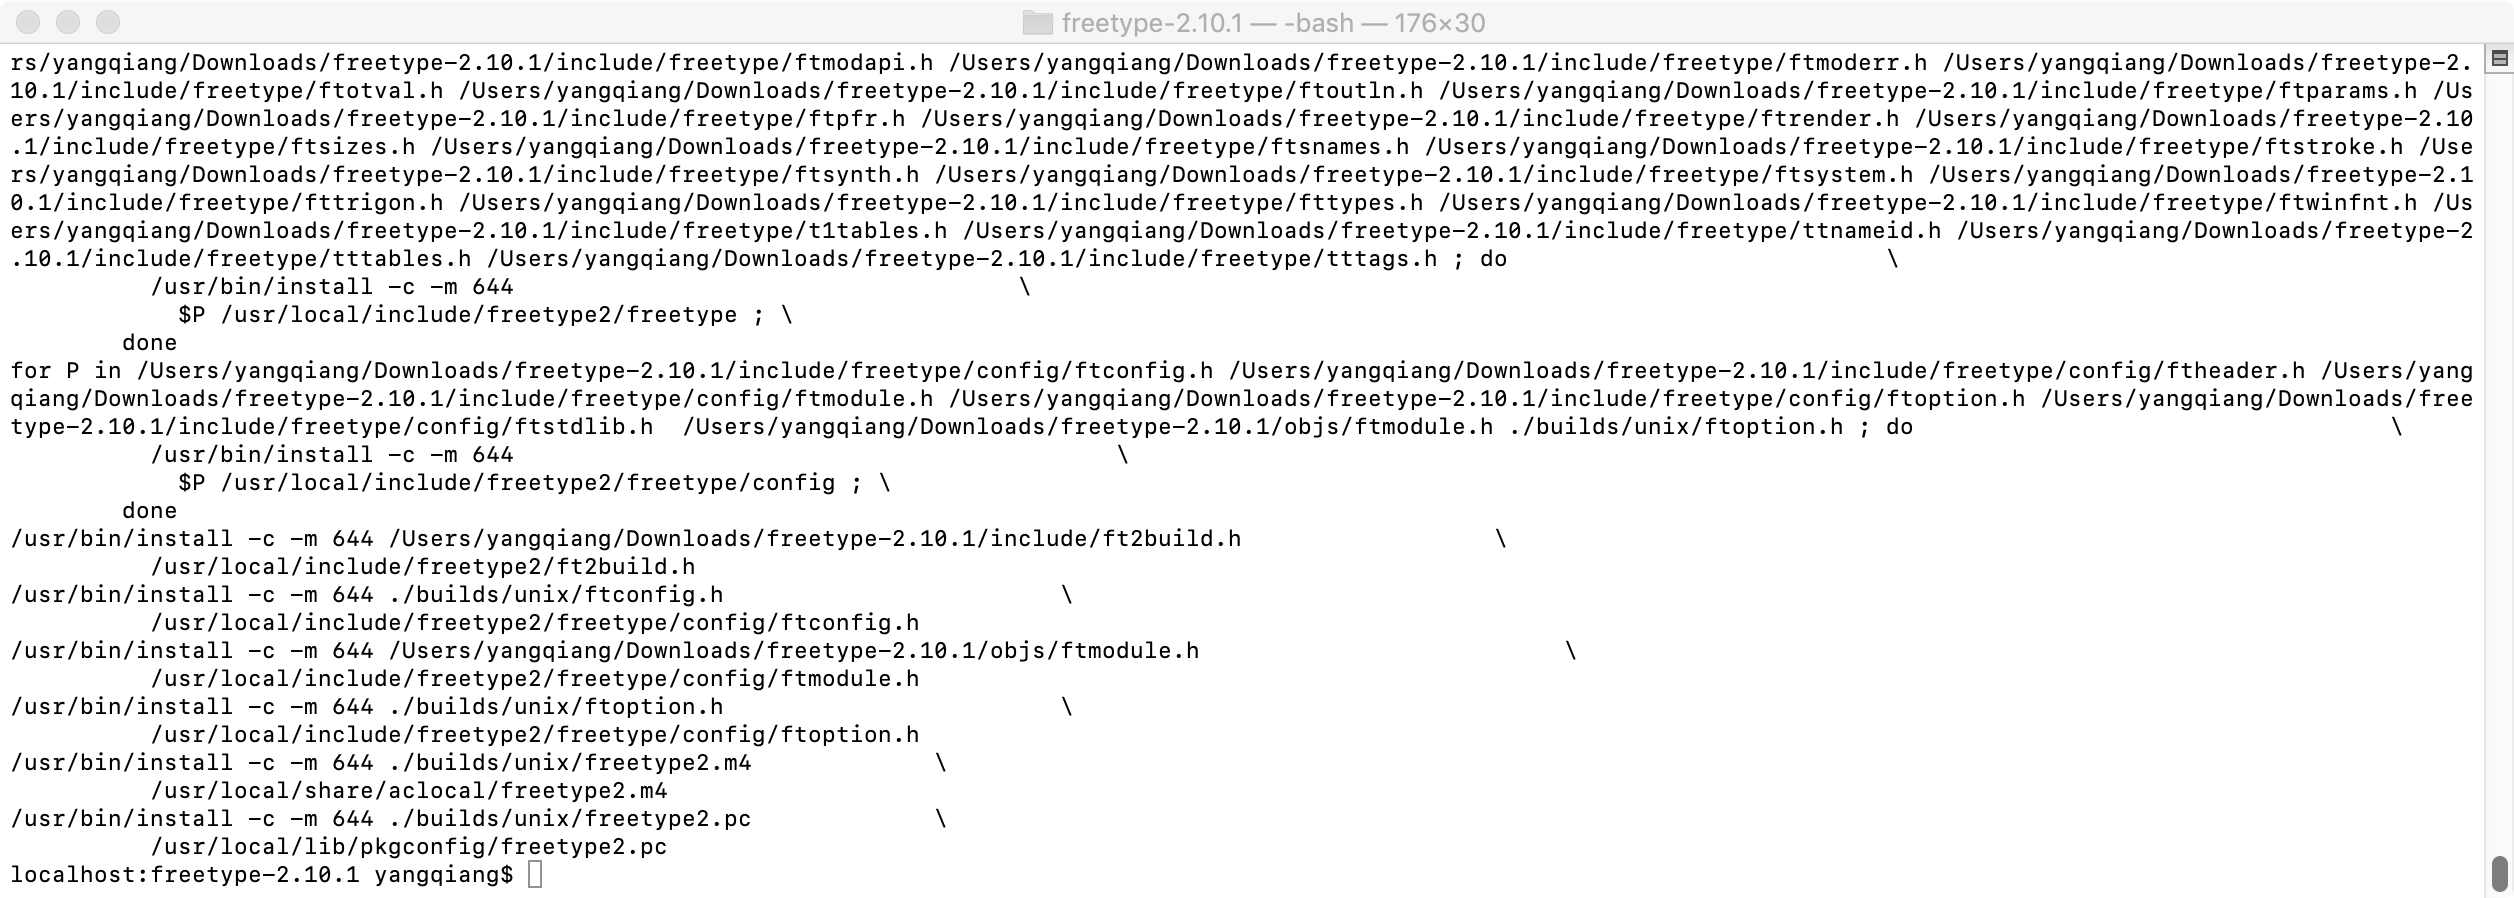

- 安装位置
    - `/usr/local/include/freetype2/`
- 库(系统默认位置，链接程序的时候需要加上，或者在代码中写动态加载)
    - 动态库.dylib
    - 静态库.a
```bash
libtool: install: /usr/bin/install -c /Users/yangqiang/Downloads/freetype-2.10.1/objs/.libs/libfreetype.6.dylib /usr/local/lib/libfreetype.6.dylib
libtool: install: (cd /usr/local/lib && { ln -s -f libfreetype.6.dylib libfreetype.dylib || { rm -f libfreetype.dylib && ln -s libfreetype.6.dylib libfreetype.dylib; }; })
libtool: install: /usr/bin/install -c /Users/yangqiang/Downloads/freetype-2.10.1/objs/.libs/libfreetype.lai /usr/local/lib/libfreetype.la
libtool: install: /usr/bin/install -c /Users/yangqiang/Downloads/freetype-2.10.1/objs/.libs/libfreetype.a /usr/local/lib/libfreetype.a
libtool: install: chmod 644 /usr/local/lib/libfreetype.a
libtool: install: ranlib /usr/local/lib/libfreetype.a
```



## 支持的字体格式

- TrueType fonts (TTF) and TrueType collections (TTC)
- CFF fonts
- WOFF fonts
- OpenType fonts (OTF, both TrueType and CFF variants) and OpenType collections (OTC)
- Type 1 fonts (PFA and PFB)
- CID-keyed Type 1 fonts
- SFNT-based bitmap fonts, including color Emoji
- X11 PCF fonts
- Windows FNT fonts
- BDF fonts (including anti-aliased ones)
- PFR fonts
- Type 42 fonts (limited support)

## API参考文档

```C++
    https://www.freetype.org/freetype2/docs/reference/index.html
```

## FreeType字体使用模式

### 头文件与动态库

1. 头文件注意下位置，使用-I指定路径

```C++
#include <freetype2/ft2build.h>
#include FT_FREETYPE_H
```

2. 动态库，安装的时候在系统目录下，需要可以使用-L指定目录
    - 下面是动态的编译与链接选项

```bash
  -I/usr/local/include/opencv4 -lfreetype
```

### 初始化字体库

- 初始化字体工作的上下文环境。

1. 使用的函数介绍

```C++
FT_EXPORT( FT_Error )    FT_Init_FreeType( FT_Library  *alibrary );
```

```C++
typedef struct FT_LibraryRec_  *FT_Library;
```

2. 例子代码

```C++
    // 1. 初始化字体库 
    FT_Library  library;
    int error = FT_Init_FreeType( &library );
    if (error){
        std::cout<< "初始化字体库错误！" <<std::endl;
        return -1;
    }
    std::cout << "库初始化成功！" << std::endl;
```

### 加载字体库文件

1. 使用的函数介绍

```C++
 FT_EXPORT( FT_Error )    FT_New_Face( 
               FT_Library   library,
               const char*  filepathname,     // 字库文件
               FT_Long      face_index,        // 一般为0，如果字库文件中存放多套字体，可以用来指定是第几套
               FT_Face     *aface );             // 返回一个指向字库的对象句柄（用他来访问字库中的字体）
```

2. 例子代码

```C++
   // 2. 加载字体库
    FT_Face     face; 
    error = FT_New_Face(library,
                     "msyh.ttf",    // 自己找一个ttf格式的字体库文件
                     0,             // 如果几个字体类型，封装在一个字体库文件中，需要指定字体类型索引编号，一般0就行了
                     &face);
    if ( error == FT_Err_Unknown_File_Format ){
        std::cout << "字体文件格式错误！" << std::endl;
        return -2;
    }
    else if ( error ){
        std::cout << "加载字体库错误！" << std::endl;
        return -3;
    }
    std::cout << "字体加载成功！" << std::endl;
```

### 设置字体大小

1. 使用的函数介绍

```C++
FT_EXPORT( FT_Error )   FT_Set_Char_Size( 
            FT_Face     face,                     // 指向字库的句柄
            FT_F26Dot6  char_width,          // 字体的大小，单位是1/64点
            FT_F26Dot6  char_height,         // 字体的大小，单位是1/64点
            FT_UInt     horz_resolution,       // 字体的分辨率（一个点的像素个数）
            FT_UInt     vert_resolution );
```

- 最后输出的图像大小由如下因素决定：
    - char_width
    - horz_resolution

- 计算公式：
    - char_width / 64   \* horz_resolution / 72
    - 下面的像素大小为 16 \* 300/ 72 = 67像素

2. 例子代码

```C++
   // 3. 设置字体大小
    error = FT_Set_Char_Size(
          face,    /* handle to face object             */
          16*64,       /* 字符宽度，单位1/64点                 */
          16*64,   /* 字符高度，单位1/64点                 */
          300,     /* 水平方向分辨率DPI 默认是72            */
          300 );   /* 垂直方向分辨率DPI(Dots Per Inch)     */
    if (error){
        std::cout<< "设置字体大小错误！" <<std::endl;
        return -4;
    }
    std::cout << "设置字体大小成功！" << std::endl;
```

### 查找字符所在的字库索引

1. 使用的函数介绍

```C++
FT_EXPORT( FT_UInt )   FT_Get_Char_Index( 
                FT_Face   face,
                FT_ULong  charcode );    // unicode字符，使用locale.h，并使用宽字节字符wchar_t类型
```

2. 例子代码

```C++
    // 4. 把字符转换为索引
    wchar_t		ch_char = L'汗';
    int char_index = FT_Get_Char_Index( face, ch_char);
    std::cout << ch_char << "索引是：" << char_index << std::endl;
```

### 加载字符图像数据

1. 使用的函数介绍

```C++
 FT_EXPORT( FT_Error )    FT_Load_Glyph( 
                 FT_Face   face,
                 FT_UInt   glyph_index,        // 指定字在字库中的索引位置
                 FT_Int32  load_flags );        // 加载方式，预先定义的宏
```

2. 例子代码

```C++
    // 5. 加载字符图像
    error = FT_Load_Glyph(
          face,                 /* handle to face object   */
          char_index,           /* 字体索引                 */
          FT_LOAD_DEFAULT);     /* 加载方式                 */
    if (error){
        std::cout<< "加载字符图像失败！" <<std::endl;
        return -5;
    }
    std::cout << "加载字符图像成功！" << std::endl;
```

### 渲染字符图像为位图

1. 使用的函数介绍

```C++
  FT_EXPORT( FT_Error ) FT_Render_Glyph( 
              FT_GlyphSlot    slot,                          // 返回位图的槽（可以使用字体对象句柄中的槽）
              FT_Render_Mode  render_mode );       // 渲染方式，是预定义的宏
```

2. 例子代码

```C++
    // 6. 绘制字符图像到slot
    error = FT_Render_Glyph(
        face->glyph,   /* 字符图像slot  */
        FT_RENDER_MODE_NORMAL ); /* 渲染方式 */
    if (error){
        std::cout<< "渲染字符图像失败！" <<std::endl;
        return -6;
    }
    std::cout << "渲染字符图像成功！" << std::endl;
```

### 导出位图为OpenCV的Mat格式

1. 导出的位图格式中关键数据的介绍
    - bitmap.rows;    // 位图的行
    - bitmap.width;   // 位图的列
    - bitmap.pitch;    // 位图每行的点的位数（pitch/width可以得到图像的深度）
    - bitmap.buffer   // 位图的数据
    
    - 注意：
        - 下面代码因为位图的深度为1，随意我们直接把Mat定义为CV_8UC1格式。

2. 例子代码

```C++
    // 7. 处理导出的图像为cv::Mat
    FT_GlyphSlot  slot = face->glyph;  /* 渲染的图像槽（slot） */
    int img_h = slot->bitmap.rows;
    int img_w = slot->bitmap.width;
    int img_d = slot->bitmap.pitch;    // 每一行的数据位数
    std::cout<< img_h << "," << img_w << "," << img_d << std::endl;

    // opencv的缓冲图像表示
    cv::Mat  img(img_h, img_w, CV_8UC1);
    // 按照行列循环，开始导出图像像素到cv::Mat。
    for(int y = 0; y < img_h; y++){
        for(int x = 0; x < img_w; x++){
            img.at<uchar>(y,x) = slot->bitmap.buffer[y * img_d + x];
        }
    }
```

3. 显示图像的代码

```C++
    // 显示汉字的图像
    cv::namedWindow("W", cv::WINDOW_NORMAL);
    cv::resizeWindow("W", 400,300);
    cv::imshow("W", img);
    cv::waitKey();
```

### 完整代码与效果

1. 代码

```C++
#include <iostream>
#include <locale.h>
#include <freetype2/ft2build.h>
#include FT_FREETYPE_H

#include <opencv2/opencv.hpp>


int main(int argc, const char** argv) {
    // 1. 初始化字体库 
    FT_Library  library;
    int error = FT_Init_FreeType( &library );
    if (error){
        std::cout<< "初始化字体库错误！" <<std::endl;
        return -1;
    }
    std::cout << "库初始化成功！" << std::endl;

    // 2. 加载字体库
    FT_Face     face; 
    error = FT_New_Face(library,
                     "msyh.ttf",    // 自己找一个ttf格式的字体库文件
                     0,             // 如果几个字体类型，封装在一个字体库文件中，需要指定字体类型索引编号，一般0就行了
                     &face);
    if ( error == FT_Err_Unknown_File_Format ){
        std::cout << "字体文件格式错误！" << std::endl;
        return -2;
    }
    else if ( error ){
        std::cout << "加载字体库错误！" << std::endl;
        return -3;
    }
    std::cout << "字体加载成功！" << std::endl;
    
    // 3. 设置字体大小
    error = FT_Set_Char_Size(
          face,    /* handle to face object             */
          16*64,       /* 字符宽度，单位1/64点                 */
          16*64,   /* 字符高度，单位1/64点                 */
          500,     /* 水平方向分辨率DPI 默认是72            */
          500 );   /* 垂直方向分辨率DPI(Dots Per Inch)     */   // 这个也决定最后输出的图像大小
    if (error){
        std::cout<< "设置字体大小错误！" <<std::endl;
        return -4;
    }
    std::cout << "设置字体大小成功！" << std::endl;

    // 4. 把字符转换为索引
    wchar_t		ch_char = L'汗';
    int char_index = FT_Get_Char_Index( face, ch_char);
    std::cout << ch_char << "索引是：" << char_index << std::endl;

    // 5. 加载字符图像
    error = FT_Load_Glyph(
          face,                 /* handle to face object   */
          char_index,           /* 字体索引                 */
          FT_LOAD_DEFAULT);     /* 加载方式                 */
    if (error){
        std::cout<< "加载字符图像失败！" <<std::endl;
        return -5;
    }
    std::cout << "加载字符图像成功！" << std::endl;

    // 6. 绘制字符图像到slot
    error = FT_Render_Glyph(
        face->glyph,   /* 字符图像slot  */
        FT_RENDER_MODE_NORMAL ); /* 渲染方式 */
    if (error){
        std::cout<< "渲染字符图像失败！" <<std::endl;
        return -6;
    }
    std::cout << "渲染字符图像成功！" << std::endl;

    // 7. 处理导出的图像为cv::Mat
    FT_GlyphSlot  slot = face->glyph;  /* 渲染的图像槽（slot） */
    int img_h = slot->bitmap.rows;
    int img_w = slot->bitmap.width;
    int img_d = slot->bitmap.pitch;    // 每一行的数据位数
    std::cout<< img_h << "," << img_w << "," << img_d << std::endl;

    // opencv的缓冲图像表示
    cv::Mat  img(img_h, img_w, CV_8UC1);
    // 按照行列循环，开始导出图像像素到cv::Mat。
    for(int y = 0; y < img_h; y++){
        for(int x = 0; x < img_w; x++){
            img.at<uchar>(y,x) = slot->bitmap.buffer[y * img_d + x];
        }
    }
    // 显示汉字的图像
    cv::namedWindow("W", cv::WINDOW_NORMAL);
    cv::resizeWindow("W", 400,300);
    cv::imshow("W", img);
    cv::waitKey();
    return 0;
}

// 编译指令：g++ -omain  cv13_freetype.cpp -std=c++11 -I/usr/local/include/freetype2  -I/usr/local/include/opencv4 -lfreetype -lopencv_core -lopencv_highgui -lopencv_imgcodecs -lopencv_imgproc 
```

2. 效果
    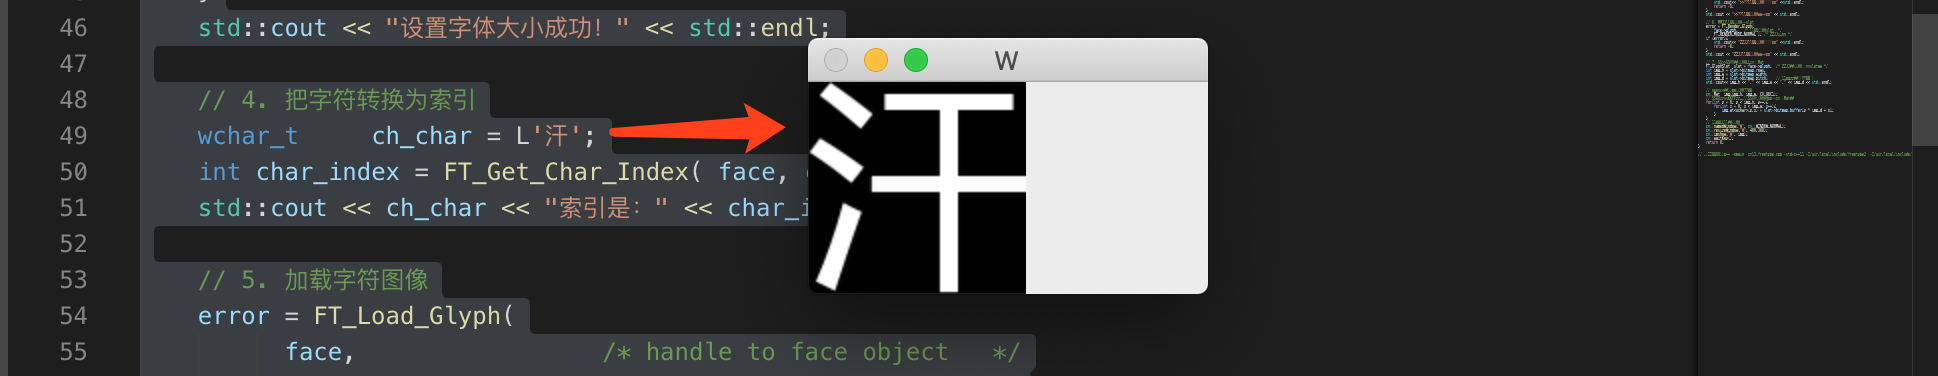
    

- 执行输出是：
    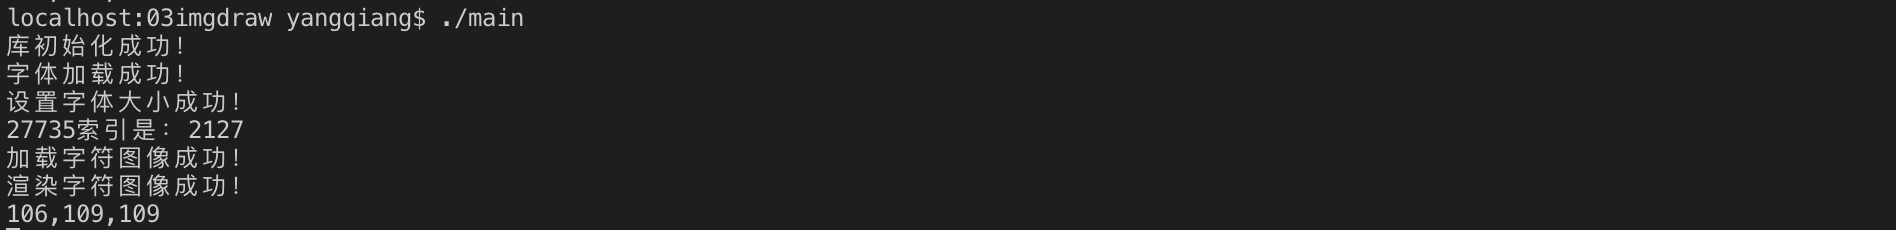

### 字体的度量单位示意图

-----